<a href="https://colab.research.google.com/github/olumideadekunle/-AI-Development-Workflow/blob/main/Week5_NLP_Assessment_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Import Required Libraries **

In [1]:
# run in a code cell
!pip install --quiet nltk gensim sentencepiece tokenizers wordcloud scikit-learn matplotlib pandas tqdm


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# run in a code cell
!git clone https://github.com/olumideadekunle/mlcohort-webscraping-week2-web-scraping
!ls -la mlcohort-webscraping-week2-web-scraping


Cloning into 'mlcohort-webscraping-week2-web-scraping'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 3), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 6.98 KiB | 2.33 MiB/s, done.
Resolving deltas: 100% (3/3), done.
total 20
drwxr-xr-x 4 root root 4096 Aug 28 14:42 .
drwxr-xr-x 1 root root 4096 Aug 28 14:42 ..
drwxr-xr-x 8 root root 4096 Aug 28 14:42 .git
-rw-r--r-- 1 root root 1454 Aug 28 14:42 README.md
drwxr-xr-x 2 root root 4096 Aug 28 14:42 scrape.py


In [4]:
import os, glob, pandas as pd, json

repo_dir = "mlcohort-webscraping-week2-web-scraping"
os.listdir(repo_dir)[:50]


['.git', 'scrape.py', 'README.md']

In [5]:
# try to find likely data files
files = sum([glob.glob(os.path.join(repo_dir, "**/*.*"), recursive=True)], [])
print("Found files (first 50):", files[:50])

# prefer CSV / JSON / TXT — look for typical names
candidates = [f for f in files if f.lower().endswith(('.csv','.json','.txt','.jsonl'))]
print("Candidates:", candidates)

# Example loader: try CSV, then JSON, else read all txt into a single corpus
def load_first_dataset(cands):
    for f in cands:
        if f.lower().endswith('.csv'):
            try:
                return pd.read_csv(f), f
            except:
                pass
        if f.lower().endswith('.json') or f.lower().endswith('.jsonl'):
            try:
                return pd.read_json(f, lines=True), f
            except:
                pass
        if f.lower().endswith('.txt'):
            try:
                with open(f, 'r', encoding='utf-8') as fh:
                    return fh.read(), f
            except:
                pass
    return None, None

data, source_file = load_first_dataset(candidates)
print("Loaded:", source_file)


Found files (first 50): ['mlcohort-webscraping-week2-web-scraping/scrape.py', 'mlcohort-webscraping-week2-web-scraping/README.md', 'mlcohort-webscraping-week2-web-scraping/scrape.py/import requests.py']
Candidates: []
Loaded: None


In [6]:
if isinstance(data, pd.DataFrame):
    display(data.head())
    # pick a text column — replace 'text' with column name if different
    # common heuristics:
    text_cols = [c for c in data.columns if data[c].dtype == object and data[c].str.len().mean() > 10]
    print("Text-like columns:", text_cols)
    main_text = data[text_cols[0]].astype(str).str.replace('\n',' ').tolist()
else:
    # data is raw string from .txt
    main_text = str(data).replace('\n',' ').split('\n')


In [7]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(s):
    s = re.sub(r'\s+', ' ', s)            # collapse whitespace incl \n
    s = s.strip()
    return s

corpus = [clean_text(t) for t in main_text if str(t).strip()]
len(corpus)


1

In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
tokenized_sentences = [word_tokenize(doc) for doc in corpus]
# lowercase + remove punctuation-ish tokens (simple)
tokenized_sentences = [[w.lower() for w in sent if re.search(r'\w', w)] for sent in tokenized_sentences]
tokenized_sentences[:3]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[['none']]

##  Import Required Libraries

In [9]:
# For data handling
import pandas as pd
import numpy as np

# For text processing
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer

# For visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# For NLP models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# For embeddings

from gensim.models import Word2Vec

# For dimensionality reduction (embedding visualization)
from sklearn.decomposition import PCA
import seaborn as sns

# Download nltk resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load Scraped Data

Assuming your Week 2 data is in a CSV file:

In [10]:
# Upload file from local computer
from google.colab import files
uploaded = files.upload()  # Select your CSV file

# Read CSV into DataFrame
data = pd.read_csv("logistics.csv")  # replace with your filename
# Attempt to find a likely text column based on previous code
text_cols = [c for c in data.columns if data[c].dtype == object and data[c].str.len().mean() > 10]
if text_cols:
  text_data = " ".join(data[text_cols[0]].astype(str))
else:
  # Fallback if no suitable text column is found
  text_data = " ".join(data.astype(str).sum(axis=1))

print(text_data[:500])  # preview first 500 characters

Saving logistics.csv to logistics (1).csv
Cardio Equipment Water Sports Indoor/Outdoor Games Cleats Water Sports Electronics Indoor/Outdoor Games Men's Footwear Men's Footwear Shop By Sport Men's Footwear Fishing Cleats Water Sports Women's Apparel Water Sports Shop By Sport Accessories Fishing Shop By Sport Men's Footwear Cleats Camping & Hiking Shop By Sport Men's Footwear Cardio Equipment Shop By Sport Men's Footwear Men's Footwear Women's Apparel Fishing Cleats Cleats Indoor/Outdoor Games Cardio Equipment Men's Footwear Cleats Indoo


## Tokenization
Word Tokenization:

In [16]:
import re

def clean_text(s):
    s = re.sub(r'\s+', ' ', s)            # collapse whitespace incl \n
    s = s.strip()
    return s

cleaned_text = clean_text(text_data)
words = word_tokenize(cleaned_text)
print(words[:20])

['Cardio', 'Equipment', 'Water', 'Sports', 'Indoor/Outdoor', 'Games', 'Cleats', 'Water', 'Sports', 'Electronics', 'Indoor/Outdoor', 'Games', 'Men', "'s", 'Footwear', 'Men', "'s", 'Footwear', 'Shop', 'By']


## Character Tokenization:

In [17]:
characters = list(cleaned_text)
print(characters[:20])


['C', 'a', 'r', 'd', 'i', 'o', ' ', 'E', 'q', 'u', 'i', 'p', 'm', 'e', 'n', 't', ' ', 'W', 'a', 't']


##  Subword Tokenization

If you want to use a simple subword approach, you can use NLTK regex tokenizer:

In [18]:
subword_tokenizer = RegexpTokenizer(r'\w+|[^\w\s]')
subwords = subword_tokenizer.tokenize(cleaned_text)
print(subwords[:20])


['Cardio', 'Equipment', 'Water', 'Sports', 'Indoor', '/', 'Outdoor', 'Games', 'Cleats', 'Water', 'Sports', 'Electronics', 'Indoor', '/', 'Outdoor', 'Games', 'Men', "'", 's', 'Footwear']


Frequency Visualization
Word Frequency Histogram:

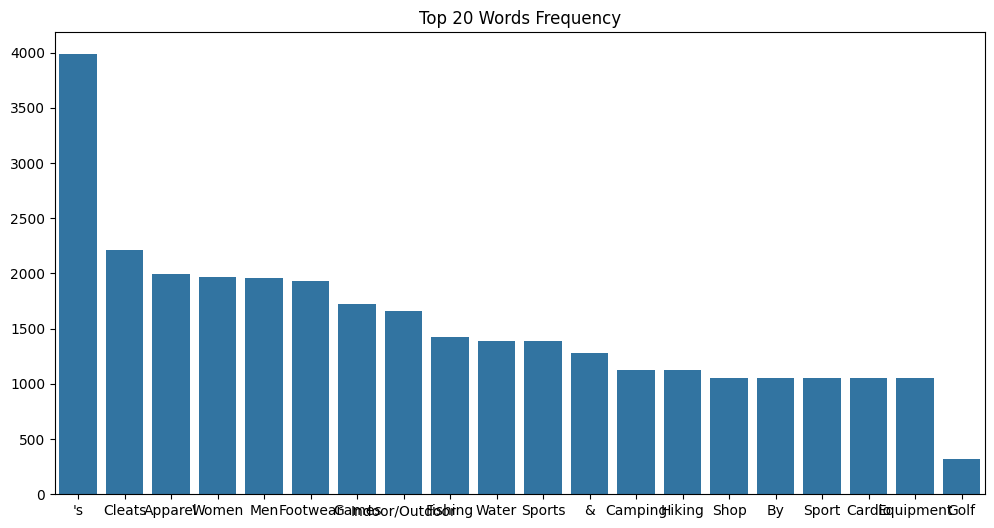

In [19]:
from collections import Counter

word_freq = Counter(words)
common_words = word_freq.most_common(20)

words_, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words_), y=list(counts))
plt.title("Top 20 Words Frequency")
plt.show()


Character Frequency Histogram:

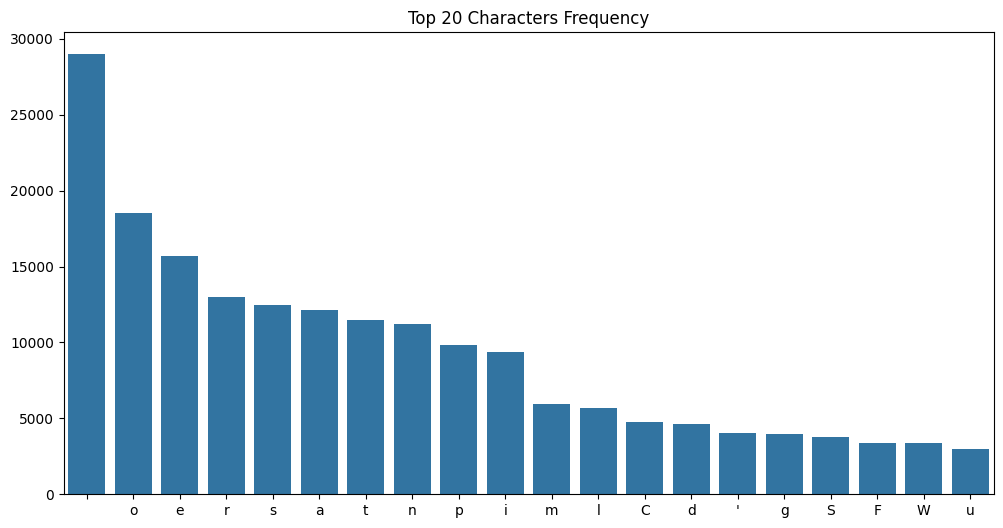

In [20]:
char_freq = Counter(characters)
common_chars = char_freq.most_common(20)

chars_, counts = zip(*common_chars)
plt.figure(figsize=(12,6))
sns.barplot(x=list(chars_), y=list(counts))
plt.title("Top 20 Characters Frequency")
plt.show()


## Word Cloud

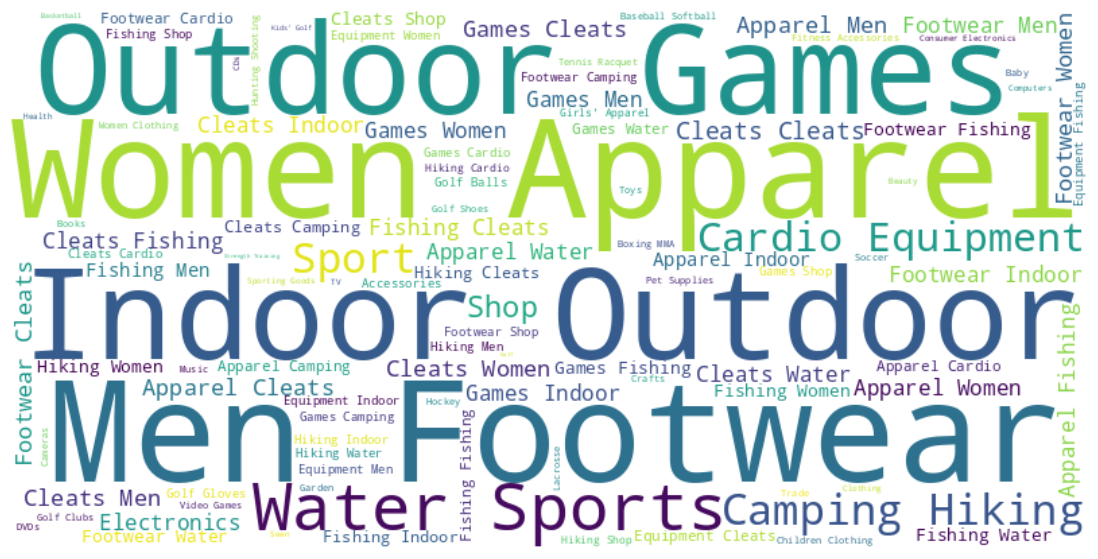

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


TF-IDF

In [22]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([cleaned_text])
feature_names = vectorizer.get_feature_names_out()
print("Sample TF-IDF Features:", feature_names[:20])


Sample TF-IDF Features: ['accessories' 'and' 'apparel' 'as' 'baby' 'balls' 'baseball' 'basketball'
 'beauty' 'books' 'boxing' 'by' 'cameras' 'camping' 'cardio' 'cds'
 'children' 'cleats' 'clothing' 'clubs']


## Word Embedding and Similarity
#     Train Word2Vec Model:

In [23]:
sentences = [word_tokenize(sentence) for sentence in sent_tokenize(cleaned_text)]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


##  Word Similarity Example:

In [25]:
similar_words = w2v_model.wv.most_similar('Sports', topn=5)
print(similar_words)

[('Electronics', 0.9966556429862976), ('Shooting', 0.9965339303016663), ('MMA', 0.9965071678161621), ('Soccer', 0.9964963793754578), ('Cameras', 0.9964489340782166)]


## Embedding Visualization

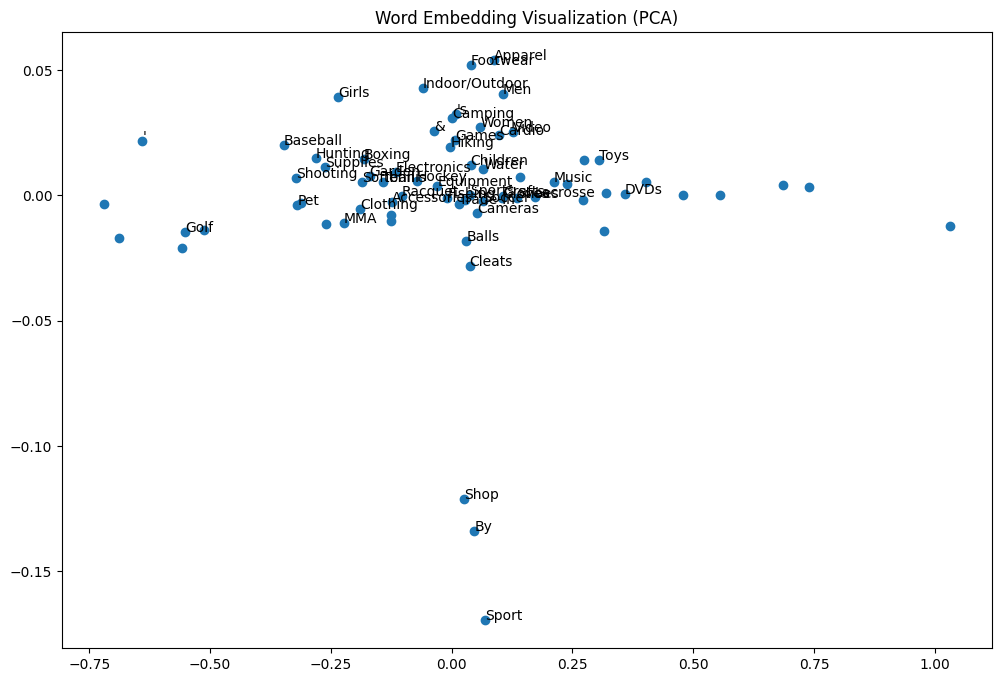

In [26]:
words = list(w2v_model.wv.index_to_key)
word_vectors = w2v_model.wv[words]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12,8))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words[:50]):  # show first 50 words
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.title("Word Embedding Visualization (PCA)")
plt.show()
